<a href="https://colab.research.google.com/github/Spaceship-titanic/kaggle_challenge/blob/main/datapreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
# Calculate null value counts
null_counts = train_df.isnull().sum()
null_percentages = (train_df.isnull().sum() / len(train_df)) * 100

# Create a DataFrame to display the results
null_info = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})

# Print the null value information
null_info

,Null Count,Null Percentage
PassengerId,0,0.000000
HomePlanet,201,2.312205
CryoSleep,217,2.496261
Cabin,199,2.289198
Destination,182,2.093639
Age,179,2.059128
VIP,203,2.335212
RoomService,181,2.082135
FoodCourt,183,2.105142
ShoppingMall,208,2.392730


/tmp/ipython-input-26-2711650748.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_null.index, y='Null Percentage', data=top_5_null, palette='viridis')


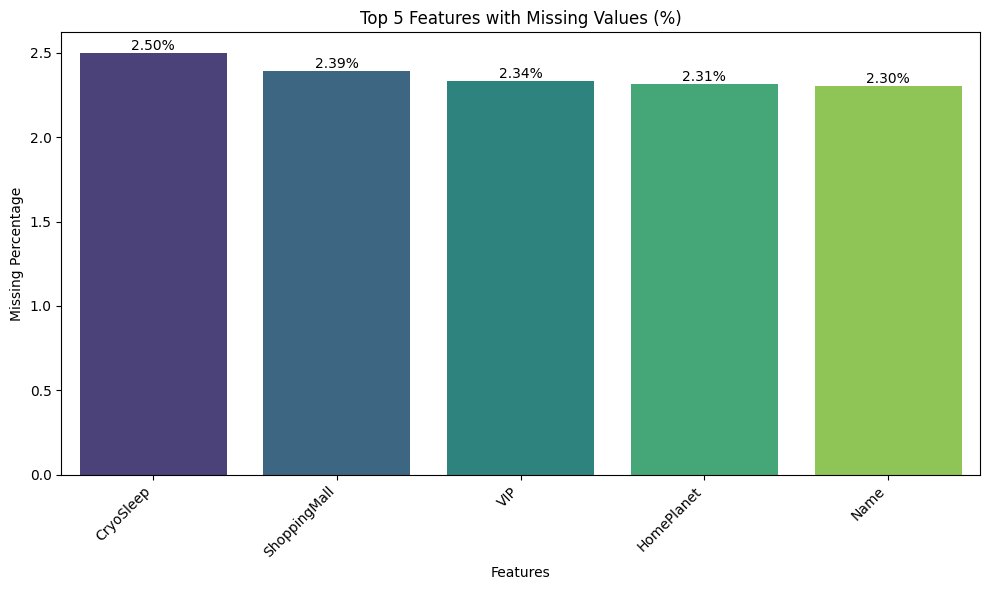

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by null percentage and get the top 5
top_5_null = null_info.sort_values(by='Null Percentage', ascending=False).head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5_null.index, y='Null Percentage', data=top_5_null, palette='viridis')
plt.title('Top 5 Features with Missing Values (%)')
plt.xlabel('Features')
plt.ylabel('Missing Percentage')
plt.xticks(rotation=45, ha='right')

# Add percentage labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

plt.tight_layout()
plt.show()


In [ ]:
train_df[['deck', 'num', 'side']] = train_df['Cabin'].str.split('/', expand=True)
train_df = train_df.drop('Cabin', axis=1)
train_df.head()


,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  deck          8494 non-null   object 
 14  num           8494 non-null   object 
 15  side          8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [ ]:
train_df['Transported'] = train_df['Transported'].astype(int)

In [ ]:
train_df.corr(numeric_only=True)['Transported'].sort_values(ascending=False)

,Transported
Transported,1.000000
FoodCourt,0.046566
ShoppingMall,0.010141
Age,-0.075026
VRDeck,-0.207075
Spa,-0.221131
RoomService,-0.244611


In [ ]:
# Drop original numeric spend and age columns
train_df = train_df.drop(['Name','PassengerId'], axis=1)


In [ ]:
def missingValues(dataset):
    dataset[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService', 'Age']] = dataset[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'RoomService', 'Age']].fillna(value=0)

    dataset['deck'].fillna(value='Missing', inplace=True)
    dataset['side'].fillna(value='Missing', inplace=True)
    dataset['num'].fillna(value=-1, inplace=True)
    dataset['HomePlanet'].fillna(value='Missing', inplace=True)
    dataset['Destination'].fillna(value='Missing', inplace=True)

    dataset['CryoSleep'] = dataset['CryoSleep'].astype(int)
    dataset['VIP'] = dataset['VIP'].astype(int)
    dataset['num'] = dataset['num'].astype(int)

missingValues(train_df)

/tmp/ipython-input-32-577193859.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['deck'].fillna(value='Missing', inplace=True)
/tmp/ipython-input-32-577193859.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,num,side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
